In [26]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
import ST 

<ipython-input-52-b08c55adb5ef>:3: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 21600/ell


In [27]:
nside_2048 = 2048
nside_1024 = 1024
nside_0256 = 256

In [28]:
lmax_0256 = 3*nside_0256 
lmax_1024 = 3*nside_1024
lmax_2048 = 3*nside_2048 

In [29]:
ell_0256 = np.arange(0,lmax_0256)
ellsc_0256 = 21600/ell_0256
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
ell_1024 = np.arange(0,lmax_1024)
ellsc_1024 = 21600/ell_1024
norm_1024 = ell_1024 * (ell_1024+1) / (2*np.pi)

<ipython-input-29-c8164f00d653>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 21600/ell_0256
<ipython-input-29-c8164f00d653>:5: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_1024 = 21600/ell_1024


In [30]:
ellsc_1024 = np.arange(0,lmax_1024)
ellsc_1024 = 21600/ell_1024
norm_1024 = ell_1024 * (ell_1024+1) / (2*np.pi)

<ipython-input-30-aa676ac91b8b>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_1024 = 21600/ell_1024


In [31]:
ell_2048 = np.arange(0,lmax_2048)
ellsc_2048 = 21600/ell_2048
norm_2048 = ell_2048 * (ell_2048+1) / (2*np.pi)

<ipython-input-31-edc34d9b659f>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_2048 = 21600/ell_2048


In [32]:
dl_test_0256 = ell_0256**2 / (1e8 + ell_0256**4) * 2e10

cl_test_0256 = dl_test_0256/ norm_0256
cl_test_0256[0] = 0

<ipython-input-32-cc01de8197f3>:3: RuntimeWarning: invalid value encountered in true_divide
  cl_test_0256 = dl_test_0256/ norm_0256


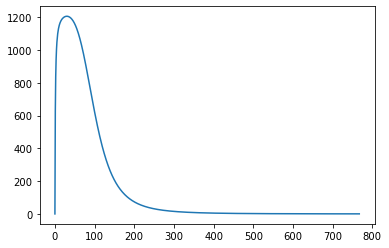

In [33]:
plt.plot (ell_0256 , cl_test_0256)

Text(0, 0.5, 'Dl')

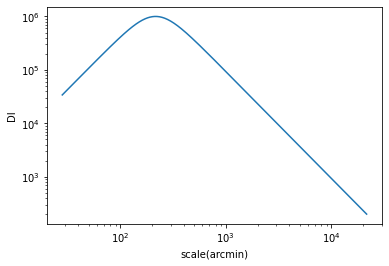

In [34]:
plt.loglog (ellsc_0256 , dl_test_0256)
plt.xlabel("scale(arcmin)")
plt.ylabel("Dl")

In [15]:
map_test_2048 = hp.synfast (cl_test , nside_2048)


NameError: name 'cl_test' is not defined

In [110]:
map_test_0256 = hp.synfast (cl_test_0256 , nside_0256)

In [111]:
map_test_0256 = map_test_0256**5
map_test_0256[1:1000] = map_test_0256[1:1000]*3

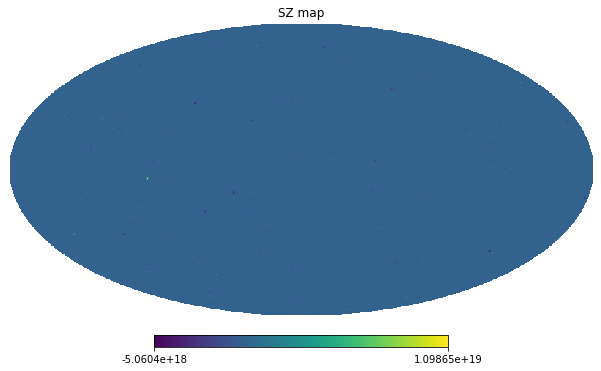

In [112]:
hp.mollview(map_test_0256 ,title="SZ map")

In [37]:
res_0256 = hp.nside2resol (nside_0256 , arcmin = False)
res_0256_arcmin = hp.nside2resol (nside_0256 , arcmin = True)
res_1024 = hp.nside2resol (nside_1024 , arcmin = False)
res_1024_arcmin = hp.nside2resol (nside_1024 , arcmin = True)
res_2048 = hp.nside2resol (nside_2048 , arcmin = False)
res_2048_arcmin = hp.nside2resol (nside_2048 , arcmin = True)

In [38]:
jmax = 10 
theta_bin = 10000

In [39]:
Jf = np.arange (0 , jmax)
scale_0256 = 2**Jf*((2*res_0256_arcmin)/0.75)
scale_2048 = 2**Jf*((2*res_2048_arcmin)/0.75)
scale_1024 = 2**Jf*((2*res_1024_arcmin)/0.75)

In [40]:
mor_l_0256 = ST.morlet_arr (res_0256, jmax , lmax_0256, theta_bin)
gaus_l_0256 = ST.gaus_arr (res_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [117]:
mor_l_2048 = s1.morlet_arr (res_2048, jmax , lmax, theta_bin)
gaus_l_2048 = s1.gaus_arr (res_2048, jmax, lmax, theta_bin)

In [113]:
s1_test_0256 , i1_test_0256 = ST.compS1 (map_test_0256 , mor_l_0256, jmax ,  nside_0256)

0
1
2
3
4
5
6
7
8
9


In [114]:
s1_test_2048 , i1_test_2048 = s1.compS1 (map_test_2048 , mor_l_2048, gaus_l_2048, res_2048, jmax , lmax , nside_2048)

NameError: name 's1' is not defined

In [115]:
cl_test_out_0256 = hp.anafast (map_test_0256 )
#cl_test_out_2048 = hp.anafast (map_test_2048 , lmax = lmax)

In [116]:
map_test_out_0256 = hp.synfast(cl_test_out_0256 , nside_0256 )
#map_test_out_2048 = hp.synfast(cl_test_out_2048 , nside_2048 )

In [117]:
s1_test_out_0256 , i1_test_out_0256 = ST.compS1 (map_test_out_0256 , mor_l_0256, jmax ,  nside_0256)

0
1
2
3
4
5
6
7
8
9


In [123]:
s1_test_out_2048 , i1_test_out_2048 = s1.compS1 (map_test_out_2048 , mor_l_2048, gaus_l_2048, res_2048, jmax , lmax , nside_2048)

0
1
2
3
4
5
6
7
8
9


In [118]:
s2_test_0256 , i2_test_0256 = ST.compS2 ( i1_test_0256, mor_l_0256,  jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
9


In [125]:
s2_test_2048  = s1.compS2 (map_test_2048 , i1_test_2048, mor_l_2048, gaus_l_2048 , res_2048, jmax, lmax , nside_2048 )

0
1
2
3
4
5
6
7
8
9


In [119]:
s2_test_out_0256 , i2_test_out_0256 = ST.compS2 ( i1_test_out_0256, mor_l_0256, jmax, nside_0256 )

0
1
2
3
4
5
6
7
8
9


In [128]:
s2_test_out_2048  = s1.compS2 (map_test_out_2048 , i1_test_out_2048, mor_l_2048, gaus_l_2048 , res_2048, jmax, lmax , nside_2048 )

0
1
2
3
4
5
6
7
8
9


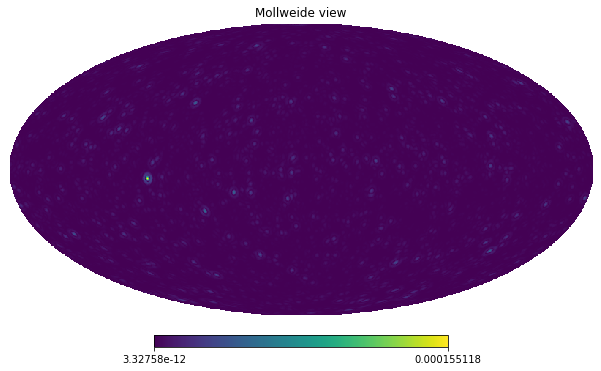

In [125]:
hp.mollview(i1_test_0256[3]/np.sum(i1_test_0256[3]))

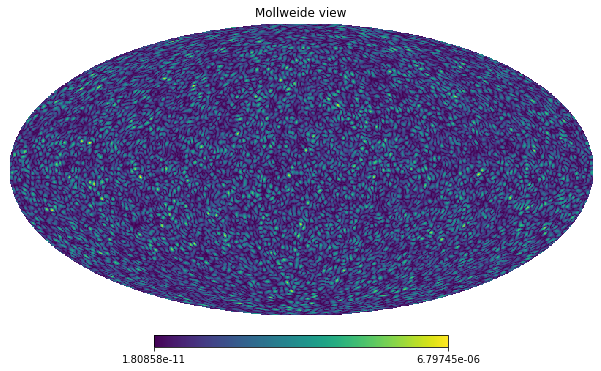

In [124]:
hp.mollview(i1_test_out_0256[3]/np.sum (i1_test_out_0256[3]))

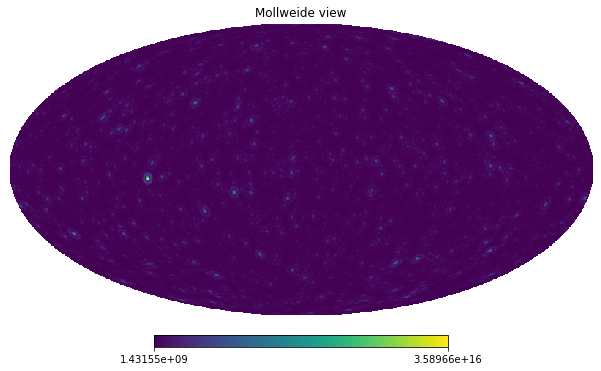

In [122]:
hp.mollview(i2_test_0256[0][3] )

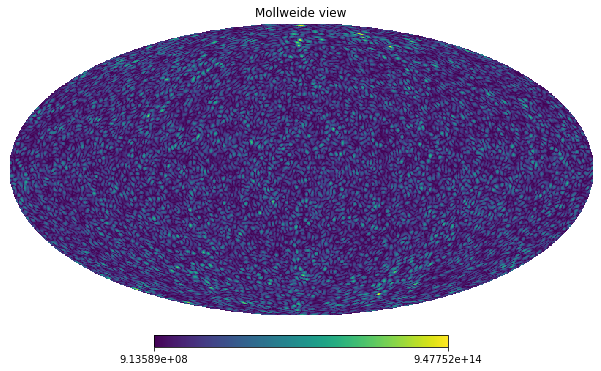

In [123]:
hp.mollview(i2_test_out_0256[0][3] )

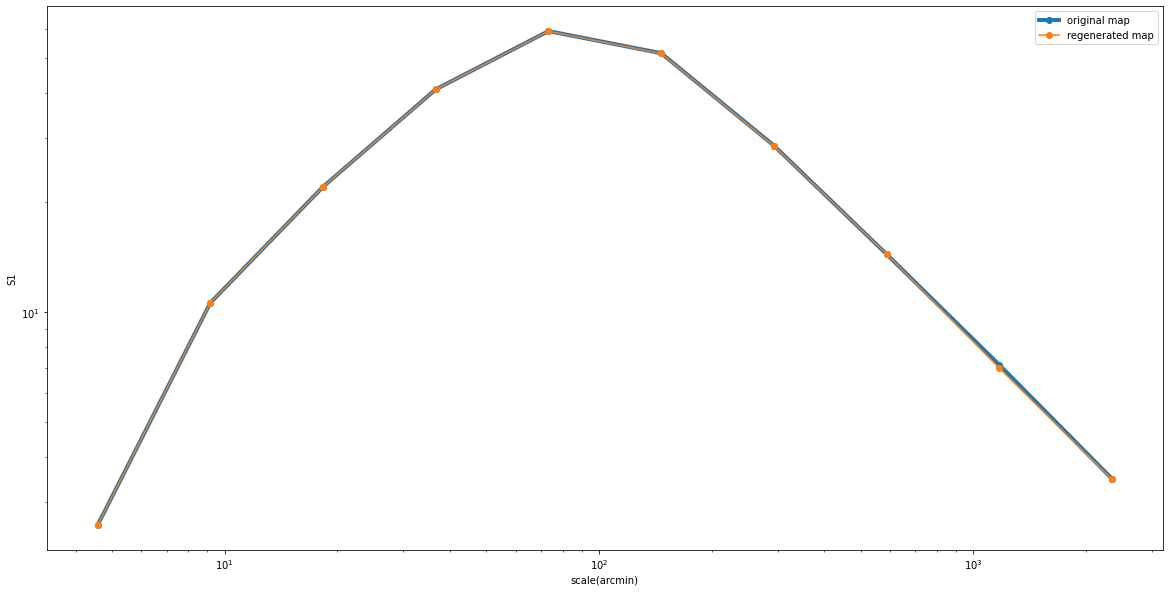

In [178]:
plt.figure(figsize=(20,10))
#plt.loglog (scale_0256,s1_test_0256,'o-')
plt.loglog (scale_2048,s1_test_2048,'o-', linewidth = 4)
#plt.loglog (scale_0256,s1_test_out_0256,'o-')
plt.loglog (scale_2048,s1_test_out_2048,'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("S1") 
plt.legend (["original map" , "regenerated map"])

Text(0, 0.5, 'log(S1)')

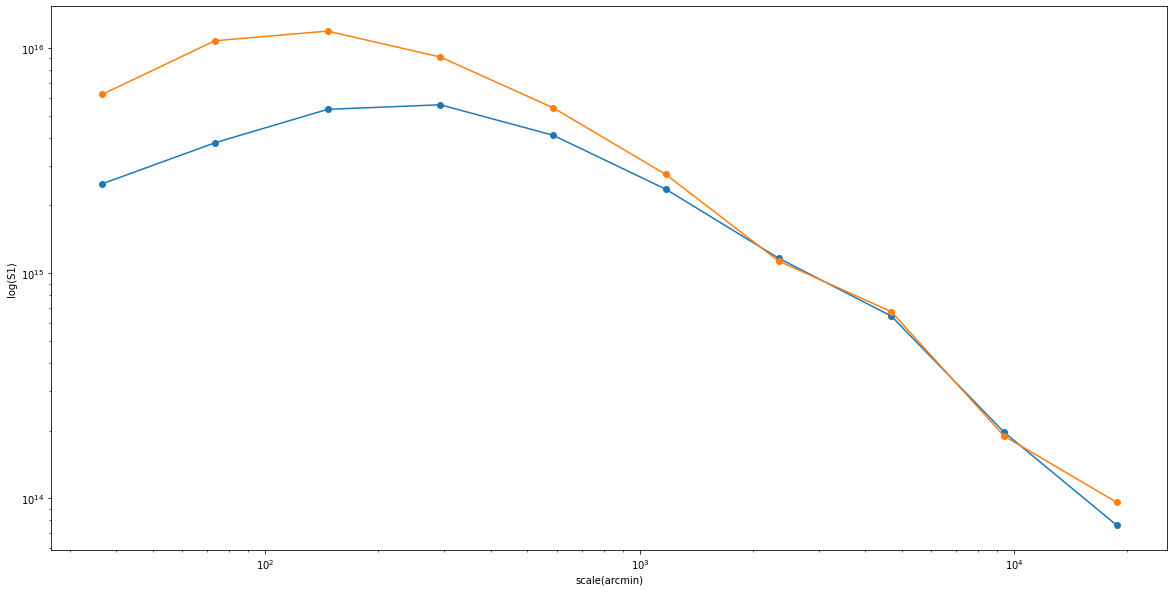

In [120]:
plt.figure(figsize=(20,10))
plt.loglog (scale_0256,s1_test_0256,'o-')
#plt.loglog (scale_2048,s1_test_2048,'o-', linewidth = 4)
plt.loglog (scale_0256,s1_test_out_0256,'o-')
#plt.loglog (scale_2048,s1_test_out_2048,'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 
#plt.legend (["256 , org" , "2048 , org" , "256 , reg" , "2048 , reg"])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


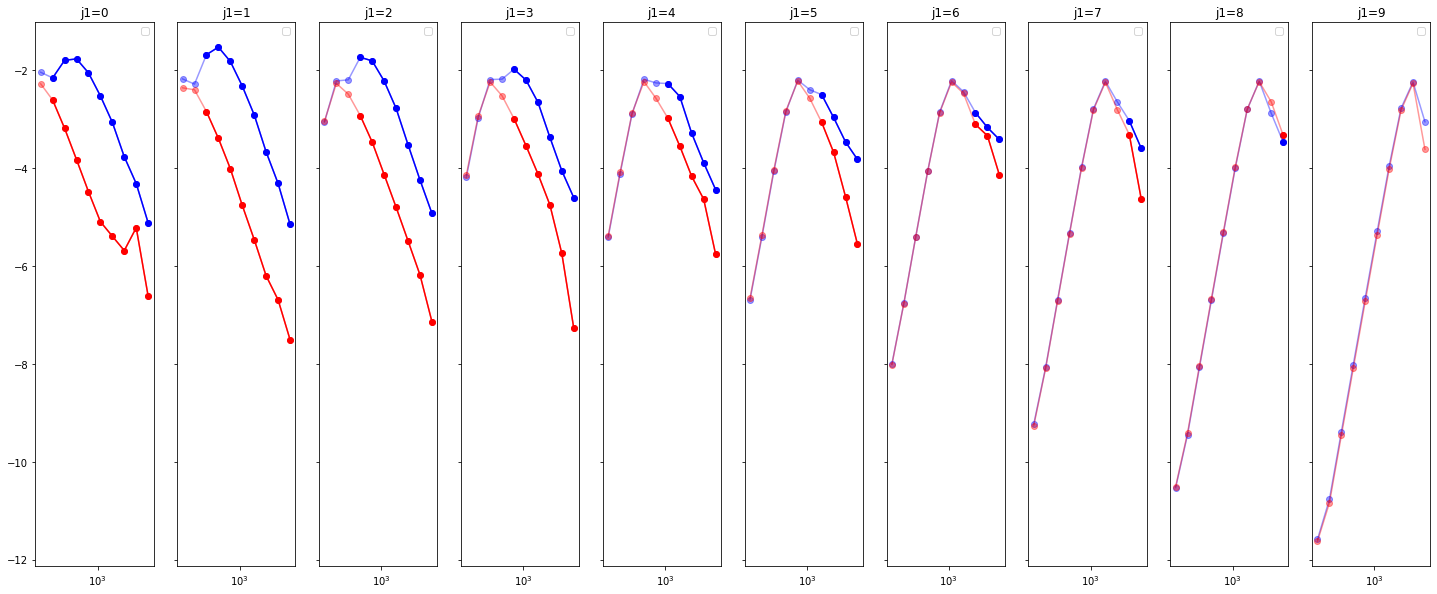

In [121]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_0256[j+1:],np.log(s2_test_0256[j,j+1:]/s1_test_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_test_out_0256[j,j+1:]/s1_test_out_0256[j]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,np.log(s2_test_0256[j,:]/s1_test_0256[j]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_test_out_0256[j,:]/s1_test_out_0256[j]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


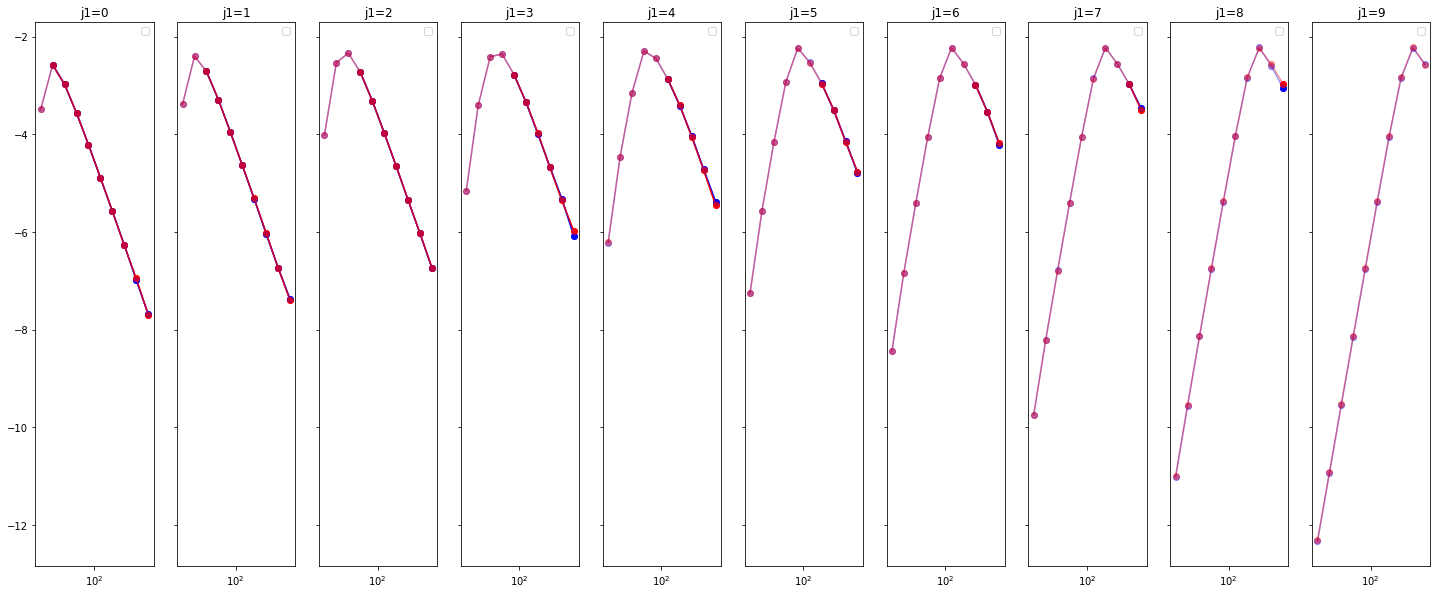

In [156]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_2048[j+1:],np.log(s2_test_2048[j,j+1:]/s1_test_2048[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_2048[j+1:],np.log(s2_test_out_2048[j,j+1:]/s1_test_out_2048[j]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_2048,np.log(s2_test_2048[j,:]/s1_test_2048[j]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_2048,np.log(s2_test_out_2048[j,:]/s1_test_out_2048[j]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
#fig.legend(['SZ map' ,'Regenerated SZ map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


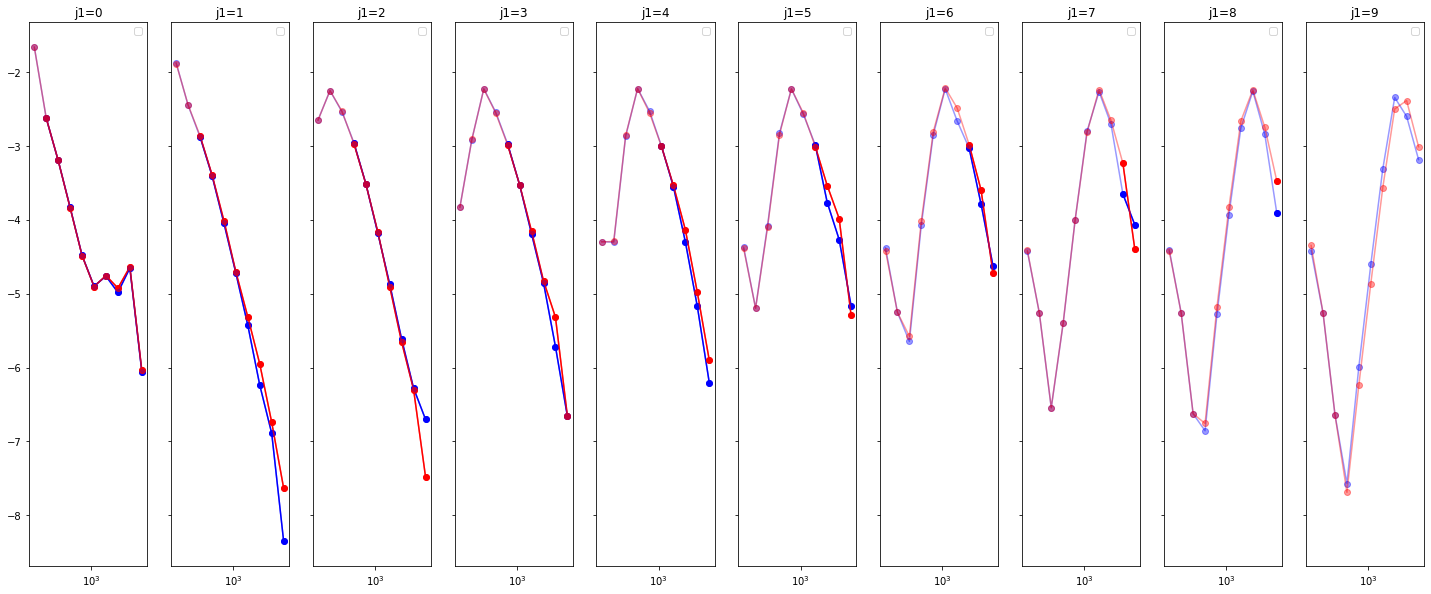

In [157]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_0256[j+1:],np.log(s2_test_0256[j,j+1:]/s1_test_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_test_out_0256[j,j+1:]/s1_test_out_0256[j]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,np.log(s2_test_0256[j,:]/s1_test_0256[j]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_test_out_0256[j,:]/s1_test_out_0256[j]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
#fig.legend(['SZ map' ,'Regenerated SZ map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

In [161]:
map_nonGaus_2048 = map_test_2048**2
print (hp.get_nside(map_nonGaus_2048))

2048


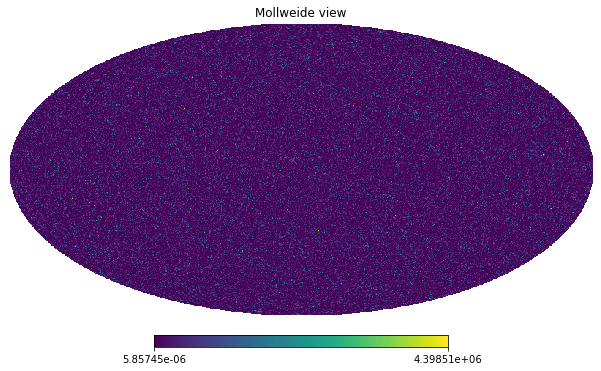

In [159]:
hp.mollview(map_nonGaus_2048)

In [160]:
cl_nonGau_2048 = hp.anafast(map_nonGaus_2048)

<ipython-input-192-cbf38a6545c1>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_2048 = 360*60/ell_2048


Text(0.5, 0, 'scale(arcmin)')

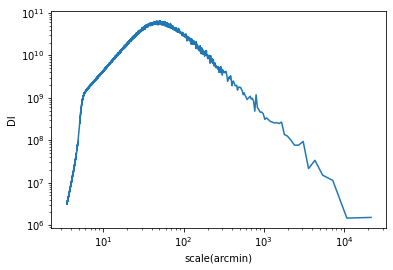

In [192]:
ell_2048 = np.arange(0,lmax_2048)
ellsc_2048 = 360*60/ell_2048
norm_2048 = ell_2048*(ell_2048+1)/(2*np.pi)
plt.loglog (ellsc_2048 , norm_2048*cl_nonGau_2048)
plt.ylabel("Dl")
plt.xlabel("scale(arcmin)")

In [163]:
lmax_2048 = cl_nonGau_2048.shape[0]

In [164]:
map_Gaus_2048 = hp.synfast (cl_nonGau_2048 , nside_2048)

In [165]:
s1_nonGaus_2048 , i1_nonGaus_2048 = s1.compS1 (map_nonGaus_2048 , mor_l_2048, gaus_l_2048, res_2048, jmax , lmax_2048 , nside_2048)

0
1
2
3
4
5
6
7
8
9


In [166]:
s1_Gaus_2048 , i1_Gaus_2048 = s1.compS1 (map_Gaus_2048 , mor_l_2048, gaus_l_2048, res_2048, jmax , lmax_2048 , nside_2048)

0
1
2
3
4
5
6
7
8
9


In [167]:
s2_nonGaus_2048 = s1.compS2 (map_nonGaus_2048 , i1_nonGaus_2048 , mor_l_2048, gaus_l_2048 , res_2048, jmax, lmax_2048 , nside_2048 )

0
1
2
3
4
5
6
7
8
9


In [168]:
s2_Gaus_2048 = s1.compS2 (map_Gaus_2048 , i1_Gaus_2048 , mor_l_2048, gaus_l_2048 , res_2048, jmax, lmax_2048 , nside_2048 )

0
1
2
3
4
5
6
7
8
9


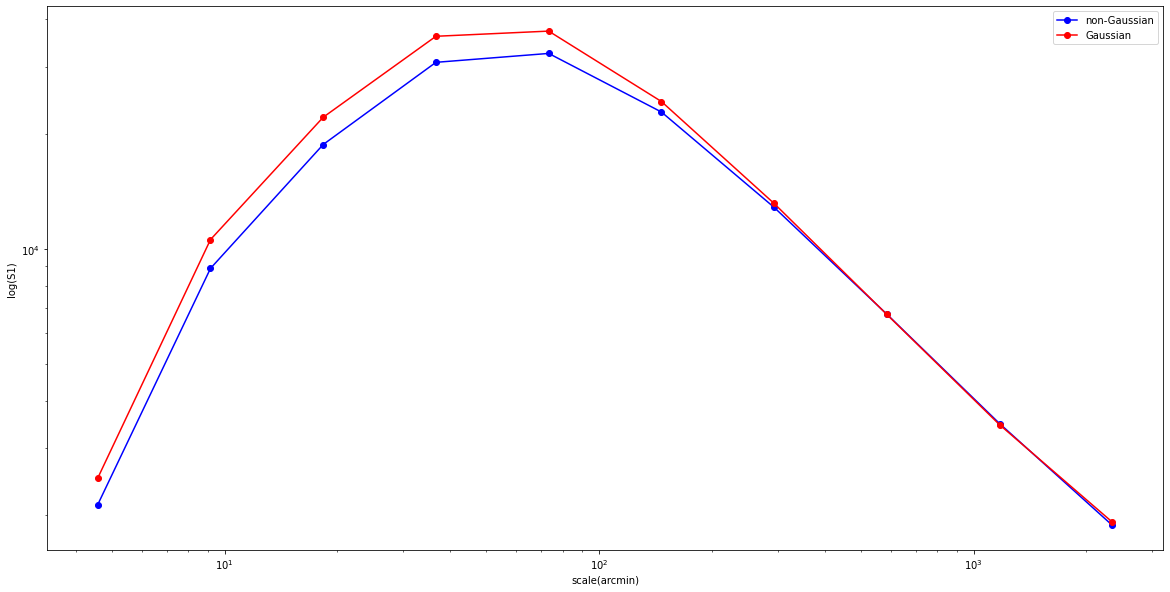

In [175]:
plt.figure(figsize=(20,10))
plt.loglog (scale_2048,s1_nonGaus_2048,'o-',color="blue")
plt.loglog (scale_2048,s1_Gaus_2048,'o-',color="red")
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 
plt.legend (["non-Gaussian", "Gaussian"])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


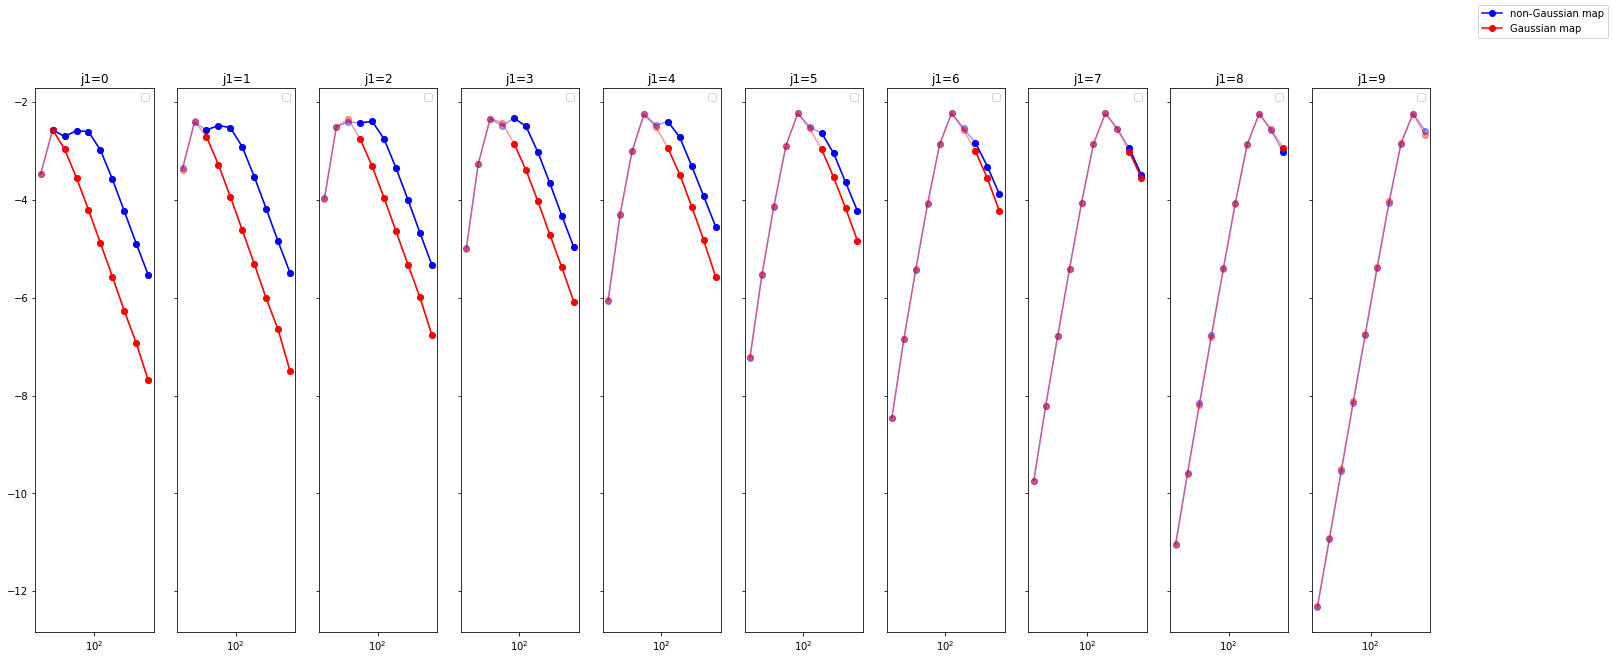

In [180]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_2048[j+1:],np.log(s2_nonGaus_2048[j,j+1:]/s1_nonGaus_2048[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_2048[j+1:],np.log(s2_Gaus_2048[j,j+1:]/s1_Gaus_2048[j]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_2048,np.log(s2_nonGaus_2048[j,:]/s1_nonGaus_2048[j]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_2048,np.log(s2_Gaus_2048[j,:]/s1_Gaus_2048[j]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(['non-Gaussian map' ,'Gaussian map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


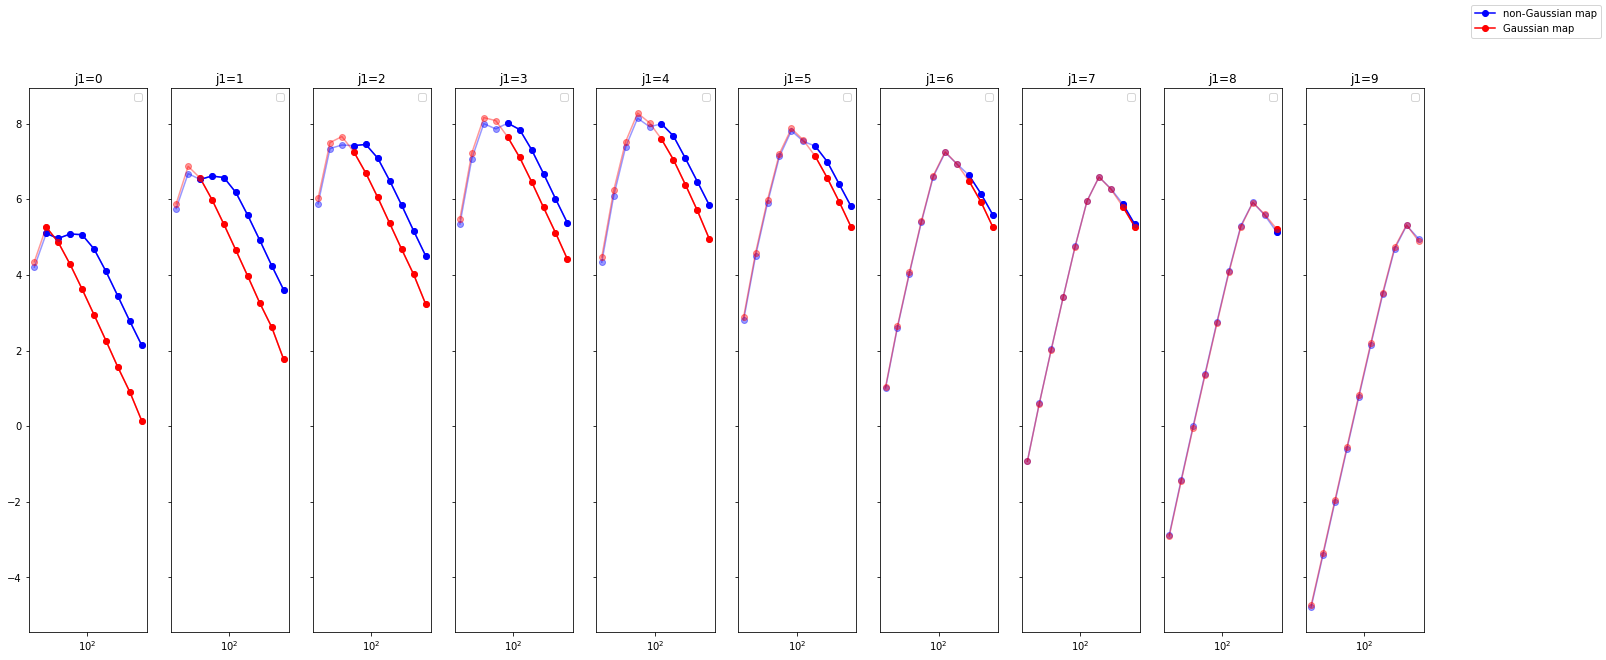

In [193]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_2048[j+1:],np.log(s2_nonGaus_2048[j,j+1:]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_2048[j+1:],np.log(s2_Gaus_2048[j,j+1:]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_2048,np.log(s2_nonGaus_2048[j,:]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_2048,np.log(s2_Gaus_2048[j,:]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(['non-Gaussian map' ,'Gaussian map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

In [363]:
map_cubed_nonGause_0256 = map_test_0256**4

In [364]:
cl_cubed_0256 = hp.anafast(map_cubed_nonGause_0256)

In [353]:
lmax_0256 = cl_cubed.shape[0]
ell_0256 = np.arange (0,lmax_0256)
ellsc_0256 = 360*60/ell_0256
norm_0256 = ell_0256*(ell_0256+1)/(2*np.pi)

<ipython-input-353-ff3c8b1776ea>:3: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256


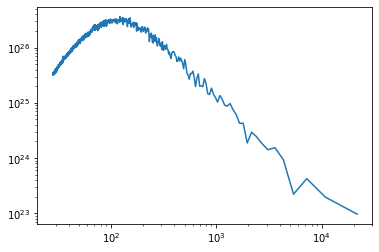

In [365]:
plt.loglog(ellsc_0256 , norm_0256*cl_cubed_0256)


In [366]:
map_cubed_Gause_0256 = hp.synfast(cl_cubed_0256 , nside_0256)

In [367]:
s1_cubed_nonGaus_0256 , i1_cubed_nonGaus_0256 = s1.compS1 (map_cubed_nonGause_0256 , mor_l_0256, gaus_l_0256, res_0256, jmax , lmax_0256 , nside_0256)

0
1
2
3
4
5
6
7
8
9


In [368]:
s1_cubed_Gaus_0256 , i1_cubed_Gaus_0256 = s1.compS1 (map_cubed_Gause_0256 , mor_l_0256, gaus_l_0256, res_0256, jmax , lmax_0256 , nside_0256)

0
1
2
3
4
5
6
7
8
9


In [370]:
s2_cubed_nonGaus_0256  = s1.compS2 (map_cubed_nonGause_0256 , i1_cubed_nonGaus_0256, mor_l_0256, gaus_l_0256 , res_0256, jmax, lmax_0256 , nside_0256 )

0
1
2
3
4
5
6
7
8
9


In [371]:
s2_cubed_Gaus_0256  = s1.compS2 (map_cubed_Gause_0256 , i1_cubed_Gaus_0256, mor_l_0256, gaus_l_0256 , res_0256, jmax, lmax_0256 , nside_0256 )

0
1
2
3
4
5
6
7
8
9


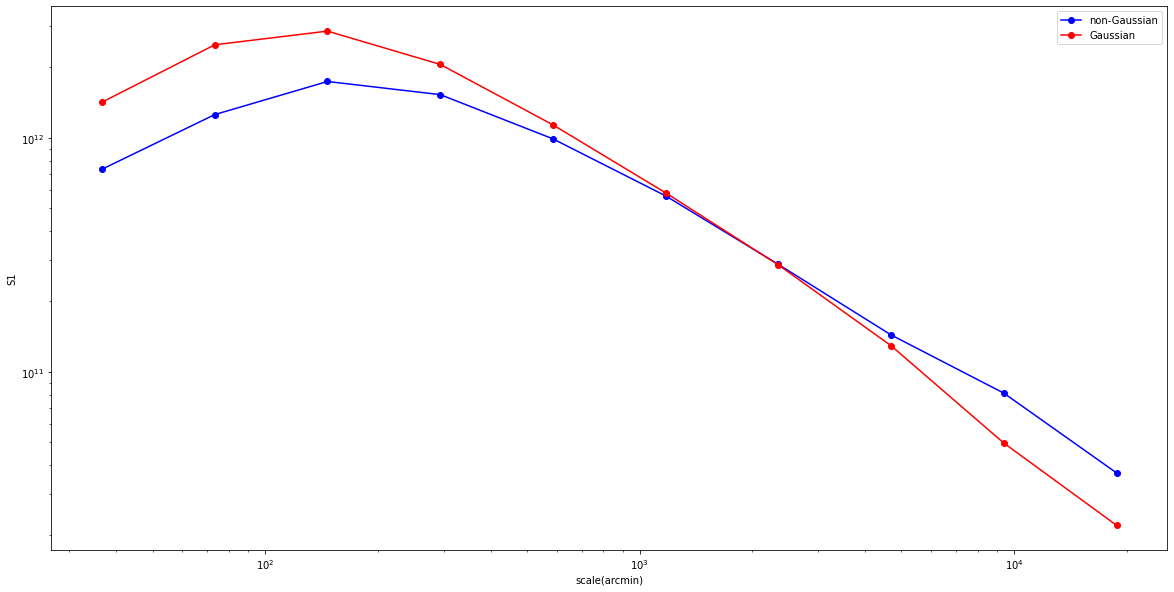

In [369]:
plt.figure(figsize=(20,10))
plt.loglog (scale_0256,s1_cubed_nonGaus_0256,'o-',color="blue")
plt.loglog (scale_0256,s1_cubed_Gaus_0256,'o-',color="red")
#plt.loglog (ellsc_0256 , cl_cubed*norm_0256)
plt.xlabel("scale(arcmin)")
plt.ylabel("S1") 
plt.legend (["non-Gaussian", "Gaussian"])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


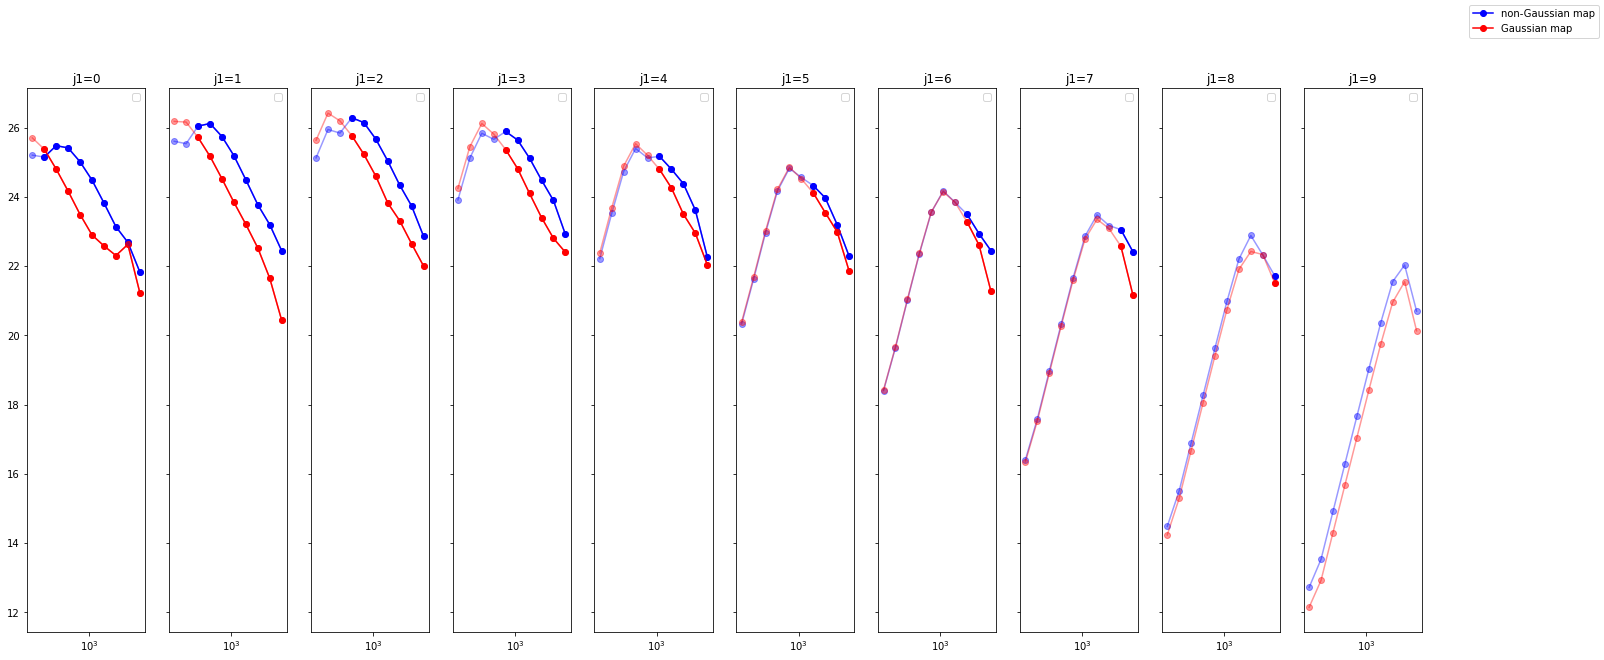

In [372]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale_0256[j+1:],np.log(s2_cubed_nonGaus_0256[j,j+1:]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_cubed_Gaus_0256[j,j+1:]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,np.log(s2_cubed_nonGaus_0256[j,:]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_cubed_Gaus_0256[j,:]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
fig.legend(['non-Gaussian map' ,'Gaussian map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

In [231]:
map_cubed_nonGaus_1024 = hp.ud_grade(map_test_2048 , nside_out=1024)
map_cubed_nonGaus_1024 = map_cubed_nonGaus_1024**3

In [240]:
nside_1024 = 1024
lmax_1024 = 3*nside_1024
ell_1024 = np.arange (0,lmax_1024)
ellsc_1024 = 360*60/ell_1024
norm_1024 = ell_1024*(ell_1024+1)/(2*np.pi)

<ipython-input-240-cbfdb20c08b6>:4: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_1024 = 360*60/ell_1024


In [237]:
cl_cubed_1024 = hp.anafast(map_cubed_nonGaus_1024)


False

In [241]:
cl_cubed_1024.shape

(3072,)

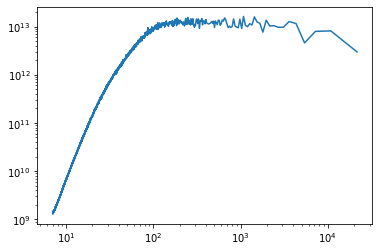

In [249]:
plt.loglog(ellsc_1024 , cl_cubed_1024)

In [257]:
map_cubed_Gaus_1024 = hp.synfast(cl_cubed_1024 , nside_1024)

In [255]:
mor_l_1024 = s1.morlet_arr (res_1024, jmax , lmax_1024, theta_bin)
gaus_l_1024 = s1.gaus_arr (res_0256, jmax, lmax_1024, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [256]:
s1_cubed_nonGaus_1024 , i1_cubed_nonGaus_1024 = s1.compS1 (map_cubed_nonGaus_1024 , mor_l_1024, gaus_l_1024, res_1024, jmax , lmax_1024 , nside_1024)

0
1
2
3
4
5
6
7
8
9


In [258]:
s1_cubed_Gaus_1024 , i1_cubed_Gaus_1024 = s1.compS1 (map_cubed_Gaus_1024 , mor_l_1024, gaus_l_1024, res_1024, jmax , lmax_1024 , nside_1024)

0
1
2
3
4
5
6
7
8
9


In [259]:
s2_cubed_nonGaus_0256  = s1.compS2 (map_cubed_nonGaus_1024 , i1_cubed_nonGaus_1024, mor_l_1024 , gaus_l_1024 , res_1024, jmax, lmax_1024 , nside_1024 )

0
1
2
3
4
5
6
7
8
9


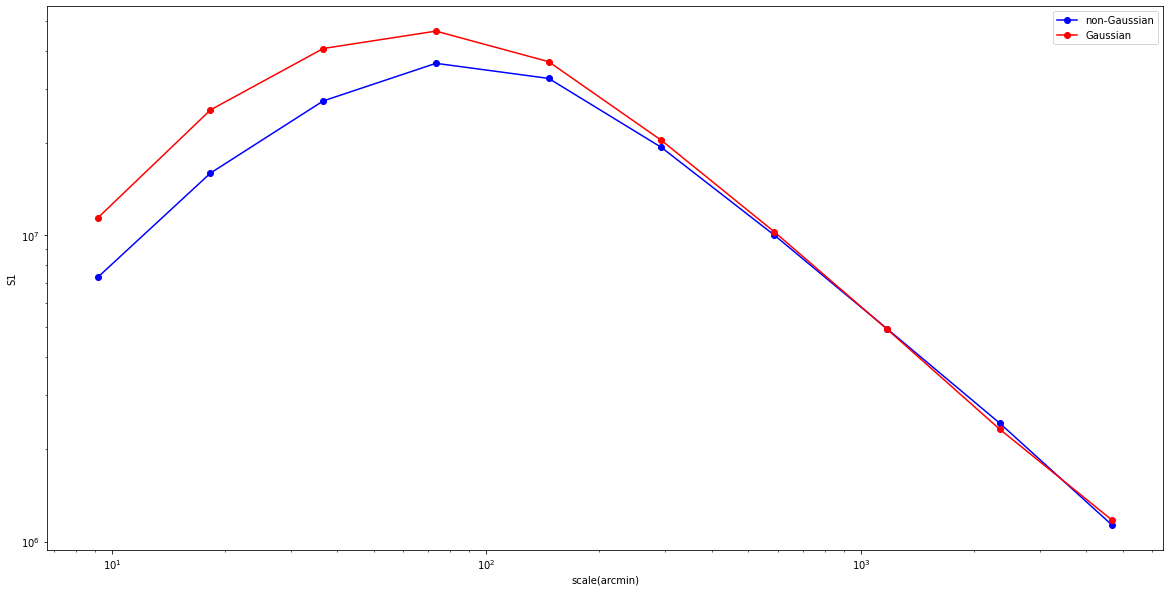

In [264]:
plt.figure(figsize=(20,10))
plt.loglog (scale_1024,s1_cubed_nonGaus_1024,'o-',color="blue")
plt.loglog (scale_1024,s1_cubed_Gaus_1024,'o-',color="red")
#plt.loglog (ellsc_0256 , cl_cubed*norm_0256)
plt.xlabel("scale(arcmin)")
plt.ylabel("S1") 
plt.legend (["non-Gaussian", "Gaussian"])